In [2]:
from cold_atom_provider import ColdAtomProvider 

provider = ColdAtomProvider('')
backend_list = provider.backends() 

print(backend_list)

[<CoherentSpinsDevice('SYNQS_NaLi_spins_backend')>]


In [3]:
from bosonic_backends import CoherentSpinsDevice
from cold_atom_provider import ColdAtomProvider 

print('here')
provider = ColdAtomProvider('token')

backend = CoherentSpinsDevice(provider)

# backend = provider.get_backend('SoPa_atomic_mixtures')
config_dict = backend.configuration().to_dict()

print(backend.access_token)

import pprint
pprint.pprint(config_dict)

here
token
{'atomic_species': ['na'],
 'backend_name': 'SYNQS_NaLi_spins_backend',
 'backend_version': '0.0.1',
 'basis_gates': ['rLx', 'rLz', 'rLz2'],
 'conditional': False,
 'coupling_map': [[]],
 'credits_required': False,
 'description': 'Setup of a cold atomic mixtures experiment with qudits.',
 'display_name': 'NaLi',
 'dynamic_reprate_enabled': False,
 'gates': [{'coupling_map': [[0], [1], [2], [3], [4]],
            'description': 'Evolution under the Z gate',
            'name': 'rLz',
            'parameters': ['delta'],
            'qasm_def': 'gate rLz(delta) {}'},
           {'coupling_map': [[0], [1], [2], [3], [4]],
            'description': 'Evolution under the Z2 gate',
            'name': 'rLz2',
            'parameters': ['chi'],
            'qasm_def': 'gate rLz2(chi) {}'},
           {'coupling_map': [[0], [1], [2], [3], [4]],
            'description': 'Evolution under the X gate',
            'name': 'rLx',
            'parameters': ['omega'],
            'qasm_

In [3]:
circuit = backend.get_empty_circuit()

print("Quantum registers in the circuit: ", circuit.qregs)
print("Classical registers in the circuit: ", circuit.cregs)
circuit.draw()

Quantum registers in the circuit:  [QuantumRegister(1, 'na'), QuantumRegister(1, 'k')]
Classical registers in the circuit:  [ClassicalRegister(2, 'c2')]


na_0: 
      
 k_0: 
      
c2: 2/

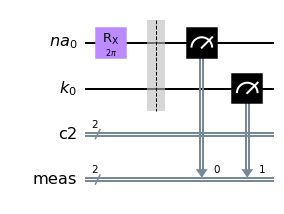

In [4]:
from gate_library import SpinsRXGate, SpinsRZGate

from qiskit.circuit.library.standard_gates.rx import RXGate
import numpy as np

circuit_list = []

time_vals = np.linspace(0, 2*np.pi, 20)

for i, time in enumerate(time_vals):
    circuit = backend.get_empty_circuit()
    
    circuit.append(RXGate(time), qargs=[0])
#     circuit.append(SpinsRZGate(delta=time), qargs=[1])
    
    
    circuit.measure_all()
    circuit_list.append(circuit)

circuit.draw(output = 'mpl')

In [5]:
job = backend.run(circuit_list)

In [6]:
print(job.job_id())
print(job.status())

20210407_092850_d55fb
<Response [200]>
200
INITIALIZING


In [7]:
result = job.result(timeout=20)

print(result)

completed cycle
completed cycle
completed cycle


JobTimeoutError: 'Timed out waiting for result'

In [ ]:
result_dict = result.to_dict()
pprint.pprint(result_dict)

In [9]:
print(job.status())

INITIALIZING
